In [406]:
import xarray as xr
import numpy  as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk

绘制MPAS输出降水的时间序列，和CMORPH之间的对应，以及误差；便于说明问题绘制了分位数图

In [378]:
# time series dir: /raid52/yycheng/MPAS/REFERENCE/CMORPH/DAILY/spatialmean
year   = "2003"
dirin  = "/raid52/yycheng/MPAS/REFERENCE/CMORPH/DAILY/spatialmean" 
filein = "spatialmean_" + year + ".nc"
ds_disk = xr.open_dataset(dirin + "/" + filein)
ds_disk

<xarray.Dataset>
Dimensions:  (lat: 1, lev: 1, lon: 1, time: 153)
Coordinates:
  * time     (time) datetime64[ns] 2003-04-01 2003-04-02 ... 2003-08-31
  * lon      (lon) float32 0.0
  * lat      (lat) float32 0.0
  * lev      (lev) float64 1.0
Data variables:
    cmorph   (time, lev, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Jan 21 00:07:24 2021: cdo fldmean ./2003/cdo_merge/CMOR...
    CDO:          Climate Data Operators version 1.9.2 (http://mpimet.mpg.de/...

In [222]:
# 一次性读入多个文件
mult_precip = xr.open_mfdataset(dirin + '/*.nc', parallel=True)
# mult_precip = mult_precip.drop_dims(['lat','lon'])

In [379]:
# 转一下list就能看下变量名了
list(ds_disk.keys())
mult_precip

<xarray.Dataset>
Dimensions:  (lat: 1, lev: 1, lon: 1, time: 1989)
Coordinates:
  * lat      (lat) float32 0.0
  * lon      (lon) float32 0.0
  * lev      (lev) float64 1.0
  * time     (time) datetime64[ns] 2003-04-01 2003-04-02 ... 2015-08-31
Data variables:
    cmorph   (time, lev, lat, lon) float32 dask.array<chunksize=(153, 1, 1, 1), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Thu Jan 21 00:07:24 2021: cdo fldmean ./2003/cdo_merge/CMOR...
    CDO:          Climate Data Operators version 1.9.2 (http://mpimet.mpg.de/...

In [380]:
df_plot = pd.DataFrame()

In [389]:
# mult_precip.coords['time']
# mult_precip.variables['cmorph']
# dti = pd.date_range("2000-04-01", periods=153, freq="D")
mult_precip_years  = dict()
mult_precip_series = []
df_plot = pd.DataFrame()
idx = pd.date_range('2003-04-01', '2003-08-31',freq="D")
for i in range(2003,2016):
    mult_precip_years[i] = mult_precip.sel(time=str(i),lev=1,lat=0,lon=0).drop(['lev','lat','lon'])['cmorph'].values
    # mult_precip_series.append()
    mult_precip_series.append(pd.Series(mult_precip_years[i],index = idx,name=i))
    # df_plot.append(test)


In [479]:
# mult_precip_years[2003].to_dataframe()
df_plot = pd.concat(mult_precip_series,axis=1)
# mk.original_test(df_)
# mkres = mk.hamed_rao_modification_test(df_plot[2015].values[:] , alpha = 0.05)
mkres = mk.hamed_rao_modification_test(np.array([0,0,1,3,3,4,5,9,10]) , alpha = 0.05)
# df_plot
mkres

Modified_Mann_Kendall_Test_Hamed_Rao_Approach(trend='increasing', h=True, p=0.0005042182294490161, z=3.478505426185217, Tau=0.9444444444444444, s=34.0, var_s=90.0, slope=1.0, intercept=-1.0)

Text(0, 0.5, 'total daily error /mm')

<Figure size 432x432 with 0 Axes>

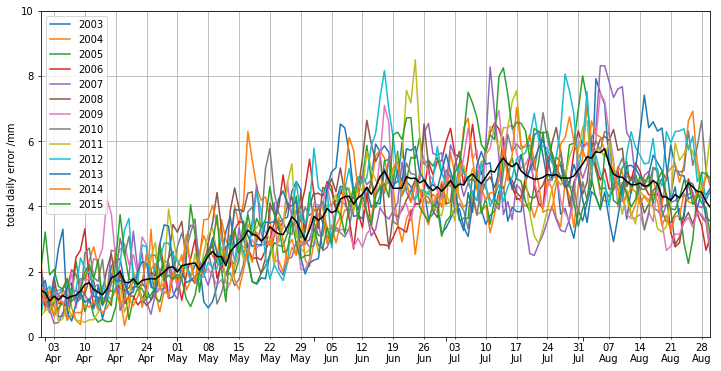

In [405]:
import matplotlib.dates as dates
# pd_plot = pd.concat([df_obs, df_mod,minus], axis=1)
plt.figure(figsize=(6,6))

ymin = 0.
ymax = 10.
# idx = pd.date_range('2003-04-01', '2003-09-01')
# s = pd.Series(np.random.randn(len(idx)), index=idx)

# fig, ax = plt.subplots(6)
# ax.plot_date(idx.to_pydatetime(), 'v-')
ax = df_plot.plot(figsize=(12,6))
ax = df_plot.mean(1).plot(color='k',label="mean")
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0),
                                                interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%b'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
# ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n'))
# ax.set_xlim([xmin,xmax])
ax.set_ylim([ymin,ymax])
# plt.tight_layout()
# plt.show()
ax.set_ylabel("total daily error /mm")
# plt.title(year)
# plt.savefig("./output_pic/precip_check_timeseries/"+year+"_time_series.png")